# III. Data Embedding

In [4]:
%run functions_3.ipynb

Part 3 functions imported.


In [14]:
import matplotlib
font = {'size': 40}
matplotlib.rc('font', **font)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.dpi']=50

In [6]:
# For this task use the weight matrix W.
G = nx.Graph(np.genfromtxt("data/sgb128Nodes41to80_weight20.txt", delimiter=' ', skip_header=1))

In [7]:
# Implement the Laplacian Eigenmap and the Local Linear Embeding (LLE)
# algorithms using the weight matrix W , and run them on your project data set.
# Specifically, implement and run:

In [8]:
# 1. Laplacian Eigenmap data embedding for target dimension d = 2;
laplacian_eigenmap_embedding = laplacian_eigenmap(G,d=2)
print(laplacian_eigenmap_embedding.T)

[[ 2.52103625e-02  6.94136072e-02]
 [-6.79956358e-02  2.04208091e-02]
 [-5.50946273e-02  2.14941374e-03]
 [ 1.93891281e-01 -2.24605247e-01]
 [-1.88068883e-02  1.30674138e-02]
 [-3.77857915e-02 -8.17262818e-05]
 [ 3.63810179e-02 -1.14998772e-02]
 [-2.30541885e-02 -3.96773834e-02]
 [ 5.98200492e-02 -3.71813889e-02]
 [ 2.04771668e-02  6.24106554e-02]
 [ 3.52130211e-04  3.74517601e-02]
 [ 5.58213863e-02 -4.16686070e-02]
 [-4.35205427e-02  1.59725460e-01]
 [-3.86200879e-02  6.71885035e-02]
 [ 4.55699771e-02 -1.38431473e-02]
 [-3.62665343e-02  1.02607621e-02]
 [-1.79905474e-01 -4.25185907e-02]
 [-8.58729267e-02 -8.50574705e-02]
 [-5.86733552e-02  9.71853848e-02]
 [ 1.79369088e-01  1.77350529e-01]
 [ 6.53610917e-02  8.38879977e-02]
 [-2.16293840e-02  4.91548555e-02]
 [-1.97097157e-01 -5.71984133e-02]
 [ 4.70901975e-02 -3.79296919e-02]
 [ 6.39482314e-03  1.29108607e-02]
 [-1.91568628e-02  4.61414464e-02]
 [-6.07352223e-03  2.24124483e-02]
 [-1.35653611e-02  8.32236012e-03]
 [-2.27695421e-03  7

In [9]:
# 2. LLE dimension reduction after Laplacian Eigenmap data embedding:

In [10]:
# (a) First run the Laplacian Eigenmap data embedding algorithm to cre-
# ate a geometric graph {x1, . . . , xn} ⊂ RN with N = 10;
laplacian_eigenmap_graph = laplacian_eigenmap(G,d=10)
print(laplacian_eigenmap_graph.shape, sep="\n")

(10, 40)


In [11]:
# (b) Then implement and run the dimension reduction LLE algorithm
# with non-negativity constraints on the this geometric graph to reduce
# dimension to d = 2; use K = 2d = 4.
lle_embedding = dimension_reduction_lle_non_negativity_constraints(laplacian_eigenmap_graph.T, K=4, d=2)
print(lle_embedding.T, sep="\n")

[[-5.34131065e-01  7.54870905e-02]
 [-4.85579046e-01 -1.66161738e-01]
 [ 3.30557159e-02 -1.51852254e-01]
 [ 1.08153767e-01 -3.64866354e-01]
 [-1.51930146e-01 -1.35890675e-01]
 [ 6.54812727e-02 -1.68147427e-01]
 [ 2.85008081e-02  9.57178800e-02]
 [-9.94159893e-02 -4.64825339e-02]
 [ 1.83527052e-01 -9.64805262e-02]
 [ 1.42411148e-01 -1.02368657e-02]
 [-1.98559322e-02 -2.23811093e-01]
 [ 3.33254252e-02 -1.35015654e-01]
 [-1.16005634e-01  1.70413939e-01]
 [ 9.92818380e-02  3.06046708e-02]
 [ 1.29485857e-01  1.61703758e-01]
 [ 7.68631685e-03 -2.62665179e-01]
 [-8.92327254e-02 -2.48277619e-02]
 [-1.52206099e-02  1.29834917e-01]
 [ 8.77510489e-02  3.77115320e-02]
 [-2.12861381e-02 -1.45599783e-01]
 [ 7.28267728e-02 -5.26706246e-02]
 [-1.35117727e-02  6.74065672e-02]
 [ 5.20842192e-04  1.68322745e-01]
 [-8.14497560e-05 -5.63896489e-02]
 [ 2.12884258e-02  4.30968365e-02]
 [ 2.70892569e-02 -2.18416208e-01]
 [ 8.66350527e-02  4.46018778e-02]
 [ 4.88778596e-02  7.44428443e-02]
 [ 1.58113883e-01  1

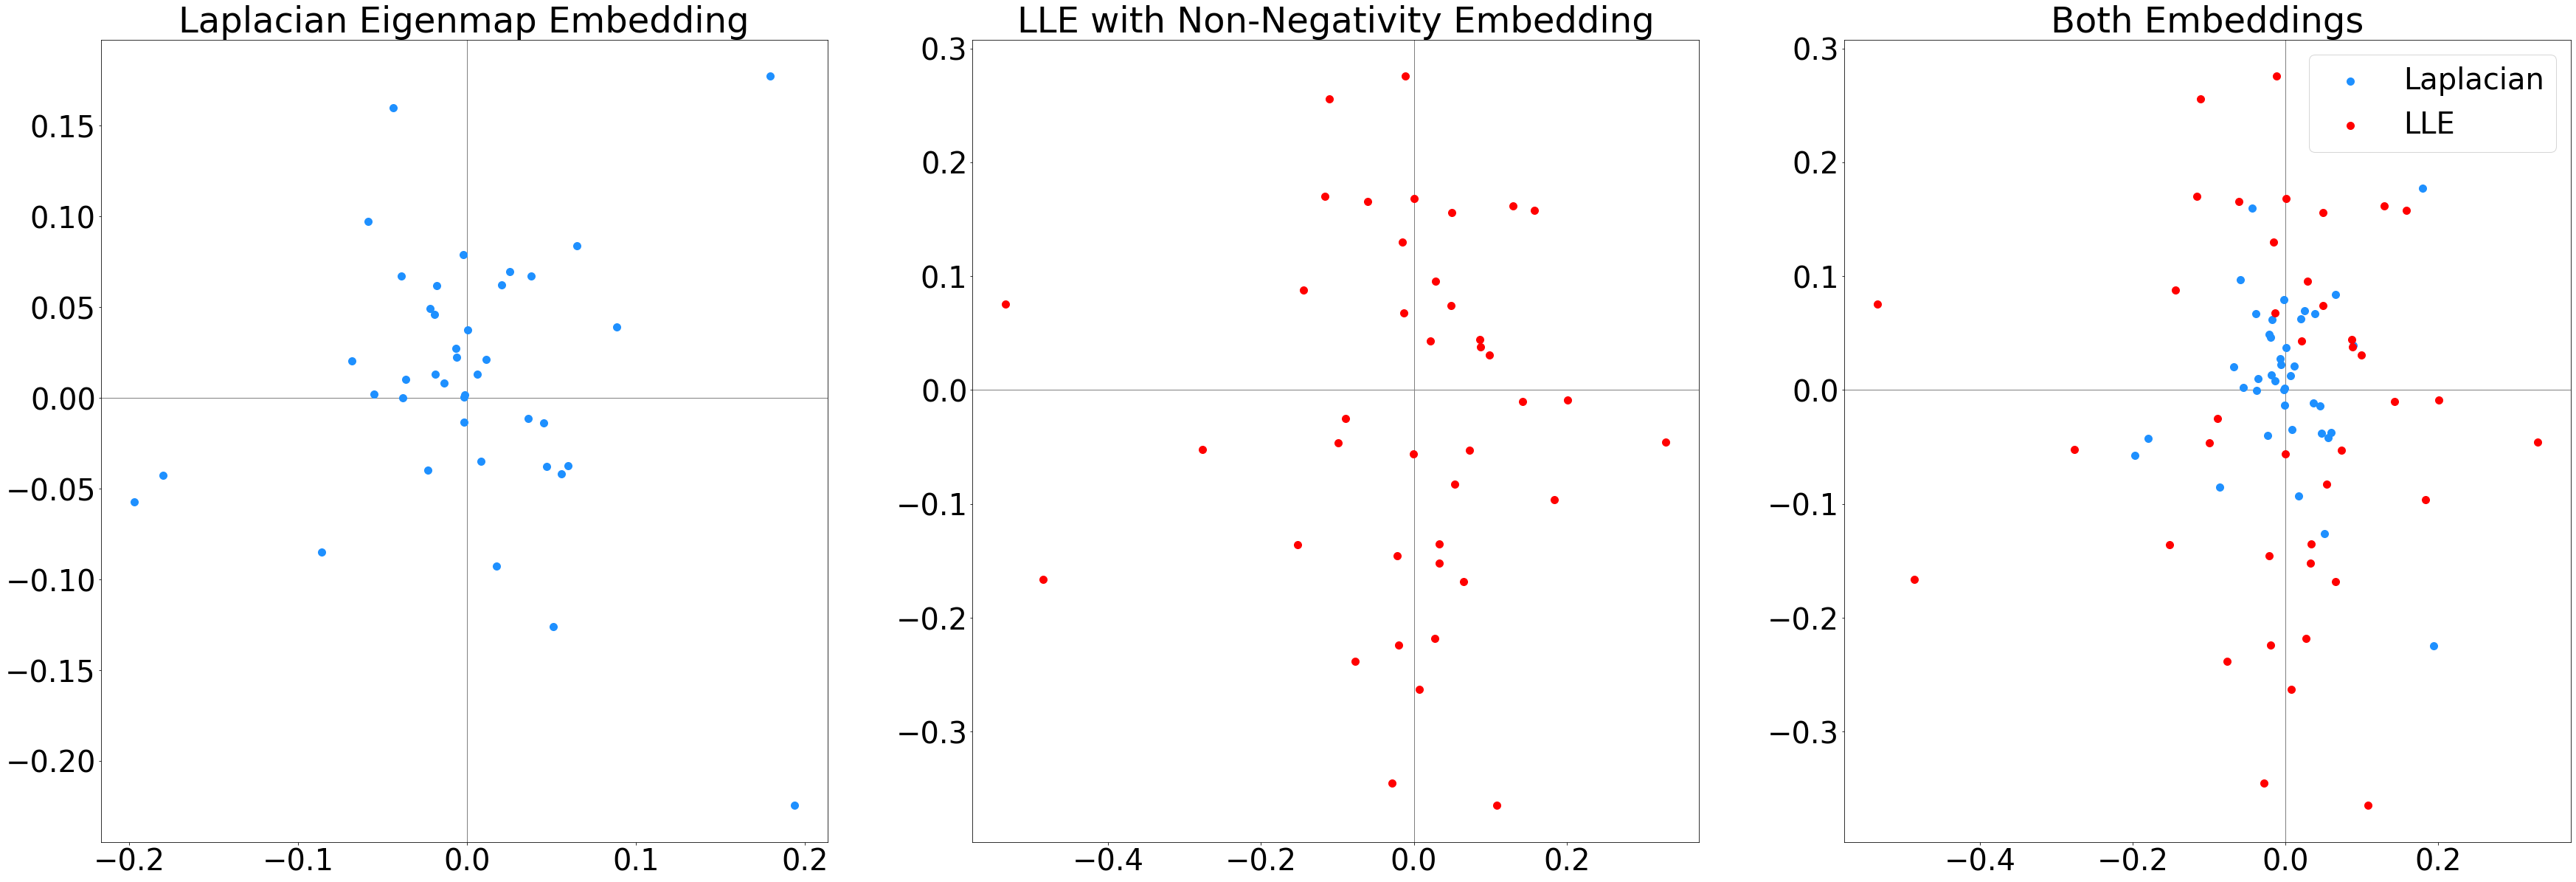

In [18]:
# Plot both embeddings in two different figures,
# and then on the same figure using different colors.

def add_axis_lines(ax): ax.axvline(x=0, c="gray", linewidth=1, zorder=-1); ax.axhline(y=0, c="gray", linewidth=1, zorder=-1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(60, 20))
add_axis_lines(ax3)
add_axis_lines(ax2)
add_axis_lines(ax1)

ax1.scatter(*laplacian_eigenmap_embedding, s=100, color="dodgerblue")
ax1.set_title("Laplacian Eigenmap Embedding")

ax2.scatter(*lle_embedding, s=100, color="red")
ax2.set_title("LLE with Non-Negativity Embedding")

ax3.scatter(*laplacian_eigenmap_embedding, s=100, color="dodgerblue", label="Laplacian")
ax3.scatter(*lle_embedding, color="red", s=100, label="LLE")
ax3.set_title("Both Embeddings")
ax3.legend()